In [1]:
from utils.preprocess_dataset import preprocess_dataframe
from tqdm import tqdm
import pandas as pd
import os

In [2]:
train_dataframes = []

for filename in tqdm(os.listdir("cleaned_data/train_data")):
    if filename.endswith(".csv"):
        train_dataframes.append(preprocess_dataframe(f"cleaned_data/train_data/{filename}", "train"))

train_data = pd.concat(train_dataframes, ignore_index=True)

  0%|          | 0/16 [00:00<?, ?it/s]/Users/alessandropranzo/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/1st Year/1st Sem/Machine Learning and Deep Learning/Handout/sub-event-detection/utils/preprocess_dataset.py:31: FutureWarning: The provided callable <function mean at 0x11881dd80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output_df = input_df.groupby('ID').agg({'Timestamp': list,'Tweet': list, 'EventType': list, "tweet_length": np.mean, "tweet_n_words": np.mean}).reset_index()
  6%|▋         | 1/16 [00:00<00:02,  6.44it/s]/Users/alessandropranzo/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/1st Year/1st Sem/Machine Learning and Deep Learning/Handout/sub-event-detection/utils/preprocess_dataset.py:31: FutureWarning: The provided callable <function mean at 0x11881dd80> is currently using SeriesGroupBy.m

In [3]:
train_data.head()

,ID,Timestamp,Tweet,EventType,tweet_length,tweet_n_words,n_tweets,Unique Common Words
0,2_0,"[2014-06-23 17:50:00, 2014-06-23 17:50:00, 201...",[if esp beats aus we'll give away a 2014 spain...,0,85.92,16.91,138,"[(bra, 12), (mex, 12), (rt, 11), (follow, 10),..."
1,2_1,"[2014-06-23 17:51:01, 2014-06-23 17:51:01, 201...",[massive test against arguably the best soccer...,0,71.49,14.18,117,"[(come, 6), (get, 5), (spiranovic,, 5), (mckay..."
2,2_2,"[2014-06-23 17:52:01, 2014-06-23 17:52:01, 201...",[2 live world cup matches now aus v esp (itv4)...,1,67.69,13.68,142,"[(vs., 13), (bra, 10), (cmr, 9), (cro, 9), (co..."
3,2_3,"[2014-06-23 17:53:01, 2014-06-23 17:53:02, 201...","[iker casillas. esp, now watching - esp vs aus...",0,73.96,14.41,142,"[(spiranovic,, 11), (bozanic,, 11), (mckay,, 1..."
4,2_4,"[2014-06-23 17:54:01, 2014-06-23 17:54:01, 201...","[leckie and taggart. go aus don't back down., ...",0,71.15,14.04,153,"[(vs., 24), (come, 13), (cmr, 11), (bra, 10), ..."


/var/folders/14/_5lf5fw13cldzrf7ntwtb8080000gn/T/ipykernel_8471/2571794504.py:28: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/14/_5lf5fw13cldzrf7ntwtb8080000gn/T/ipykernel_8471/2571794504.py:28: UserWarning: Glyph 128155 (\N{YELLOW HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/14/_5lf5fw13cldzrf7ntwtb8080000gn/T/ipykernel_8471/2571794504.py:28: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/14/_5lf5fw13cldzrf7ntwtb8080000gn/T/ipykernel_8471/2571794504.py:28: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/14/_5lf5fw13cldzrf7ntwtb8080000gn/T/ipykernel_8471/2571794504.py:28: UserWarning: Glyph 127469 (\N{REGIONAL INDICATOR SYMBOL LETTER H}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/14/_5lf5fw13cldzrf7ntwtb8080000gn/T/ipykernel_

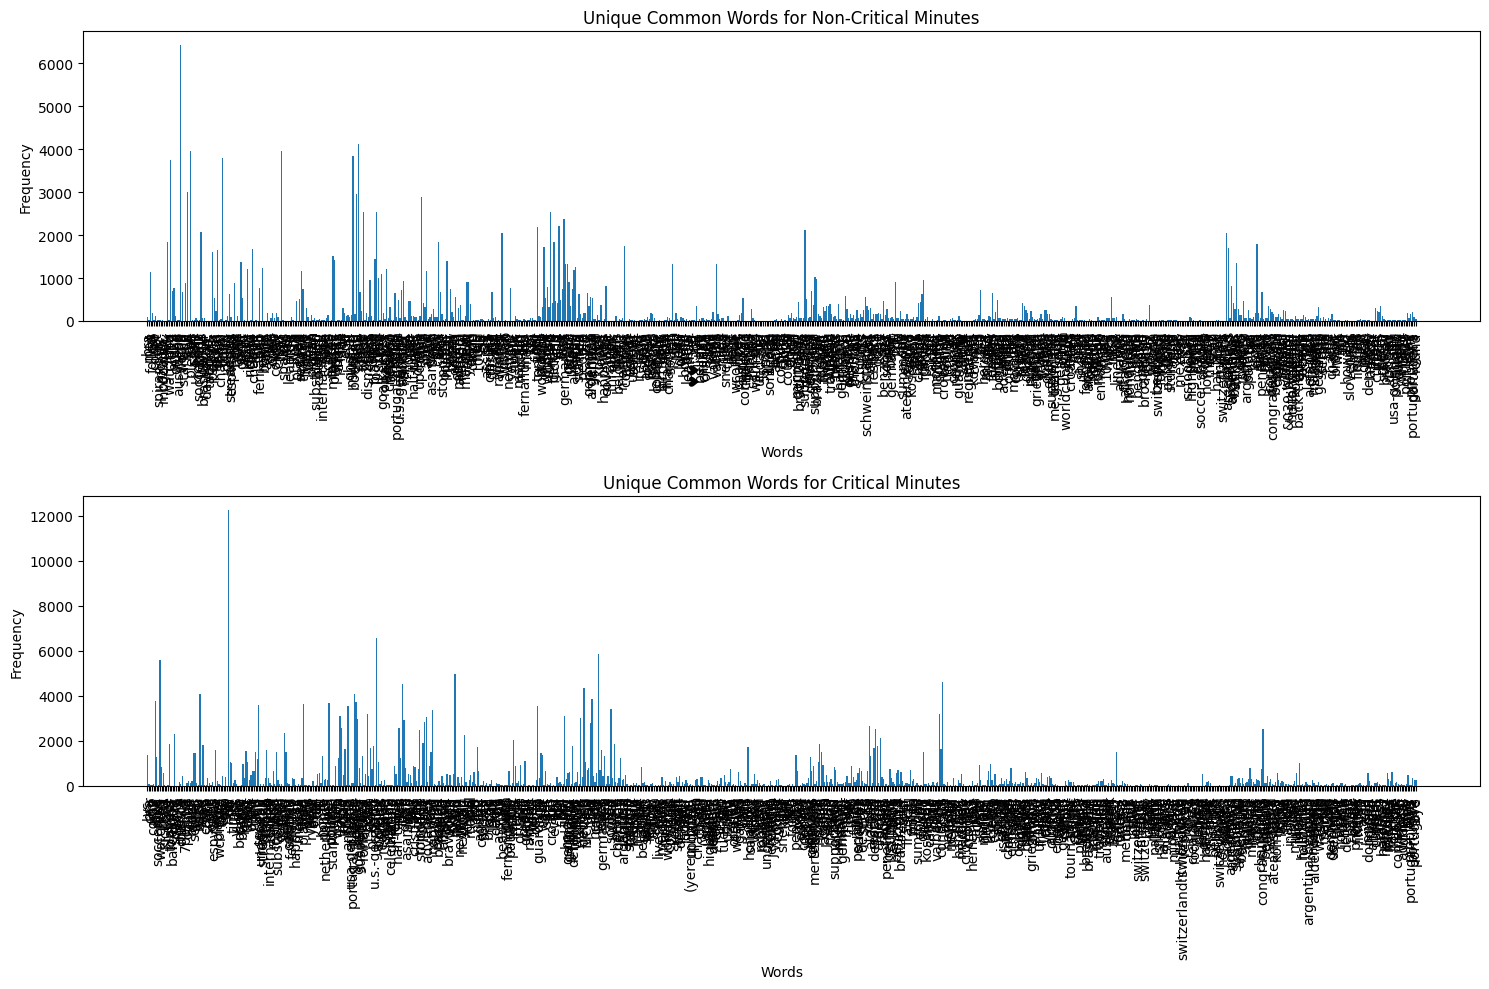

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

unique_words_eventtype_0 = Counter()
unique_words_eventtype_1 = Counter()

for words in train_data[train_data["EventType"] == 0]["Unique Common Words"]:
    unique_words_eventtype_0.update(dict(words))

for words in train_data[train_data["EventType"] == 1]["Unique Common Words"]:
    unique_words_eventtype_1.update(dict(words))

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].bar(unique_words_eventtype_0.keys(), unique_words_eventtype_0.values())
axes[0].set_title('Unique Common Words for Non-Critical Minutes')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=90)

# EventType 1
axes[1].bar(unique_words_eventtype_1.keys(), unique_words_eventtype_1.values())
axes[1].set_title('Unique Common Words for Critical Minutes')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [10]:
unique_words_eventtype_0.total()

190437

In [11]:
unique_words_eventtype_1.total()

341814

In [16]:
train_data["Frequency of Unique Common Words"] = train_data["Unique Common Words"].apply(lambda x: sum(dict(x).values()))

In [17]:
train_data.head()

,ID,Timestamp,Tweet,EventType,tweet_length,tweet_n_words,n_tweets,Unique Common Words,Frequency of Unique Common Words
0,2_0,"[2014-06-23 17:50:00, 2014-06-23 17:50:00, 201...",[if esp beats aus we'll give away a 2014 spain...,0,85.92,16.91,138,"[(bra, 12), (mex, 12), (rt, 11), (follow, 10),...",55
1,2_1,"[2014-06-23 17:51:01, 2014-06-23 17:51:01, 201...",[massive test against arguably the best soccer...,0,71.49,14.18,117,"[(come, 6), (get, 5), (spiranovic,, 5), (mckay...",26
2,2_2,"[2014-06-23 17:52:01, 2014-06-23 17:52:01, 201...",[2 live world cup matches now aus v esp (itv4)...,1,67.69,13.68,142,"[(vs., 13), (bra, 10), (cmr, 9), (cro, 9), (co...",48
3,2_3,"[2014-06-23 17:53:01, 2014-06-23 17:53:02, 201...","[iker casillas. esp, now watching - esp vs aus...",0,73.96,14.41,142,"[(spiranovic,, 11), (bozanic,, 11), (mckay,, 1...",53
4,2_4,"[2014-06-23 17:54:01, 2014-06-23 17:54:01, 201...","[leckie and taggart. go aus don't back down., ...",0,71.15,14.04,153,"[(vs., 24), (come, 13), (cmr, 11), (bra, 10), ...",68


In [20]:
mean_event_0_freq = train_data[train_data["EventType"] == 0]["Frequency of Unique Common Words"].mean()
mean_event_1_freq = train_data[train_data["EventType"] == 1]["Frequency of Unique Common Words"].mean()
std_event_0_freq = train_data[train_data["EventType"] == 0]["Frequency of Unique Common Words"].std()
std_event_1_freq = train_data[train_data["EventType"] == 1]["Frequency of Unique Common Words"].std()

print(f"Mean Frequency of Unique Common Words for Non-Critical Minutes: {mean_event_0_freq} +/- {std_event_0_freq}")
print(f"Mean Frequency of Unique Common Words for Critical Minutes: {mean_event_1_freq} +/- {std_event_1_freq}")

Mean Frequency of Unique Common Words for Non-Critical Minutes: 193.53353658536585 +/- 165.72036680152144
Mean Frequency of Unique Common Words for Critical Minutes: 296.45620121422377 +/- 277.4587526248292


In [23]:
threshold = (mean_event_0_freq * (std_event_1_freq**2) + mean_event_1_freq * (std_event_0_freq**2)) / ((std_event_1_freq**2) + (std_event_0_freq**2))
threshold

np.float64(220.59607240844085)

In [26]:
import numpy as np

In [30]:
a = (1 / std_event_0_freq**2) - (1 / std_event_1_freq**2)
b = -2 * (mean_event_0_freq / std_event_0_freq**2 - mean_event_1_freq / std_event_1_freq**2)
c = (mean_event_0_freq**2 / std_event_0_freq**2) - (mean_event_1_freq**2 / std_event_1_freq**2)

coefficients = [a, b, c]
gaussian_threshold = np.roots(coefficients)[0]
gaussian_threshold

np.float64(232.01996563139582)

In [31]:
eval_dataframes = []

for filename in tqdm(os.listdir("cleaned_data/eval_data")):
    if filename.endswith(".csv"):
        eval_dataframes.append(preprocess_dataframe(f"cleaned_data/eval_data/{filename}", "eval"))

eval_dataframes = pd.concat(eval_dataframes, ignore_index=True)

  0%|          | 0/4 [00:00<?, ?it/s]/Users/alessandropranzo/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/1st Year/1st Sem/Machine Learning and Deep Learning/Handout/sub-event-detection/utils/preprocess_dataset.py:34: FutureWarning: The provided callable <function mean at 0x11881dd80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output_df = input_df.groupby('ID').agg({'Timestamp': list,'Tweet': list, "tweet_length": np.mean, "tweet_n_words": np.mean}).reset_index()
 25%|██▌       | 1/4 [00:00<00:02,  1.46it/s]/Users/alessandropranzo/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/1st Year/1st Sem/Machine Learning and Deep Learning/Handout/sub-event-detection/utils/preprocess_dataset.py:34: FutureWarning: The provided callable <function mean at 0x11881dd80> is currently using SeriesGroupBy.mean. In a future vers

In [32]:
eval_dataframes["Frequency of Unique Common Words"] = eval_dataframes["Unique Common Words"].apply(lambda x: sum(dict(x).values()))

In [33]:
eval_dataframes.head()

,ID,Timestamp,Tweet,tweet_length,tweet_n_words,n_tweets,Unique Common Words,Frequency of Unique Common Words
0,6_0,"[2014-06-21 20:50:00, 2014-06-21 20:50:00, 201...","[i finally get to see germany play ger 🇩🇪⚽🏆, i...",73.78,13.76,867,"[(messi, 85), (iran, 44), (argentina, 38), (li...",229
1,6_1,"[2014-06-21 20:51:01, 2014-06-21 20:51:01, 201...",[here are a couple recipe ideas inspired by th...,69.74,12.97,705,"[(messi, 60), (argentina, 38), (iran, 32), (le...",171
2,6_2,"[2014-06-21 20:52:01, 2014-06-21 20:52:01, 201...","[go user! world cup who are you supporting?, i...",67.47,12.69,685,"[(messi, 54), (argentina, 36), (iran, 29), (wa...",152
3,6_3,"[2014-06-21 20:53:01, 2014-06-21 20:53:01, 201...",[gergha kevin-prince boateng (gha) will meet h...,66.25,12.44,779,"[(messi, 48), (brothers, 29), (argentina, 28),...",148
4,6_4,"[2014-06-21 20:54:01, 2014-06-21 20:54:01, 201...",[thing is.. ozil looks like one of my aquarium...,64.61,12.08,947,"[(messi, 49), (brazil, 44), (brothers, 27), (i...",172


In [35]:
eval_dataframes["Simple_Model_Prediction"] = eval_dataframes["Frequency of Unique Common Words"].apply(lambda x: 1.0 if x > threshold else 0.0)
eval_dataframes["Gaussian_Model_Prediction"] = eval_dataframes["Frequency of Unique Common Words"].apply(lambda x: 1.0 if x > gaussian_threshold else 0.0)

In [42]:
submission = eval_dataframes[["ID", "Simple_Model_Prediction"]]
submission.rename(columns={"Simple_Model_Prediction": "EventType"}, inplace=True)
submission.to_csv("model_output/submissions/sub_3/submission_simple.csv", index=False)

/var/folders/14/_5lf5fw13cldzrf7ntwtb8080000gn/T/ipykernel_8471/3293006218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.rename(columns={"Simple_Model_Prediction": "EventType"}, inplace=True)


In [43]:
submission = eval_dataframes[["ID", "Gaussian_Model_Prediction"]]
submission.rename(columns={"Gaussian_Model_Prediction": "EventType"}, inplace=True)
submission.to_csv("model_output/submissions/sub_3/submission_gaussian.csv", index=False)

/var/folders/14/_5lf5fw13cldzrf7ntwtb8080000gn/T/ipykernel_8471/3927596053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.rename(columns={"Gaussian_Model_Prediction": "EventType"}, inplace=True)
